# Predictive Analytics on the Kaggle ML & DS Survey - March 3, 2021

## Background
- The purpose of this challenge was to “tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration.” More information on the competition, data, and prizes can be found on: https://www.kaggle.com/c/kaggle-survey-2020/data
- The dataset provided (Kaggle_survey_2020_responses.csv) contains the survey results provided by Kaggle. The survey results from 20036 participants are shown in 355 columns, representing survey questions. Not all questions are answered by each participant, and responses contain various data types. In the dataset, column Q24 “What is your current yearly compensation (approximate USD)" contains the ordinary categorical target variable. The original data (kaggle_survey_2020_responses.csv) has been transformed to clean_kaggle_data_2020.csv as per the code given in KaggleSalary_DataSet.ipynb. In the dataset to be used for this project(clean_kaggle_data_2020.csv- File to be read in notebook for this Assignment, You should work with the clean dataset for this assignment), rows with the null values of salaries have been dropped. In addition, two columns (‘Q24_Encoded’ and ‘Q24_buckets’) has been added at the end. Column ‘Q24_buckets’ (Target Variable for Assignment 2) have been obtained by combining some salary buckets in the column ‘Q24’. Column ‘Q24_Encoded’ has been obtained by label encoding the column ‘Q24_buckets’.
- The purpose of this project is to train, validate, and tune multi-class ordinary classification models that can classify, given a set of survey responses by a data scientist, what a survey respondent’s current yearly compensation bucket is.

## 1. Data Cleaning

In [661]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline 

In [662]:
data= pd.read_csv('clean_kaggle_data_2020.csv')

In [663]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"


In [664]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 357 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time from Start to Finish (seconds)  10730 non-null  object 
 1   Q1                                   10730 non-null  object 
 2   Q2                                   10730 non-null  object 
 3   Q3                                   10730 non-null  object 
 4   Q4                                   10730 non-null  object 
 5   Q5                                   10730 non-null  object 
 6   Q6                                   10730 non-null  object 
 7   Q7_Part_1                            8721 non-null   object 
 8   Q7_Part_2                            2756 non-null   object 
 9   Q7_Part_3                            4981 non-null   object 
 10  Q7_Part_4                            1401 non-null   object 
 11  Q7_Part_5                  

In [665]:
data = data.iloc[1:]
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
5,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"
10726,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
10727,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
10728,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"


## 1.1 Clean up single choice questions

In [666]:
# Single Choice questions: Q1-6, 8, 11, 13, 15,20,21,22,24,25,30,32,38

In [667]:
data.Q1.unique()

array(['30-34', '35-39', '22-24', '55-59', '50-54', '25-29', '18-21',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

In [668]:
data.Q2.unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

In [669]:
# In Q2, Remove entries with 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe'
data=data[(data.Q2 == 'Man') | (data.Q2 =='Woman')]

In [670]:
#Top 20 countries in Q3
selected_countries=data.groupby(['Q3']).count().Q1.nlargest(20).index
selected_countries

Index(['India', 'United States of America', 'Other', 'Brazil', 'Japan',
       'Russia', 'United Kingdom of Great Britain and Northern Ireland',
       'Germany', 'Nigeria', 'Spain', 'Canada', 'France', 'Italy', 'China',
       'Turkey', 'Australia', 'Mexico', 'Indonesia', 'Pakistan', 'Taiwan'],
      dtype='object', name='Q3')

In [671]:
data=data[data.Q3.isin(selected_countries)]

In [672]:
data.Q4.unique()

array(['Master’s degree', 'Doctoral degree', 'Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'], dtype=object)

In [673]:
# For Q4, remove entries ' No formal education past high school', 'I prefer not to answer'
data.groupby(['Q4']).count().Q1.nlargest(8)

Q4
Master’s degree                                                      3807
Bachelor’s degree                                                    2403
Doctoral degree                                                      1303
Professional degree                                                   350
Some college/university study without earning a bachelor’s degree     277
I prefer not to answer                                                111
No formal education past high school                                   83
Name: Q1, dtype: int64

In [674]:
data=data[(data.Q4 == "Bachelor’s degree")|(data.Q4 == "Master’s degree")|(data.Q4 == "Doctoral degree")|
    (data.Q4 == "Professional degree")|(data.Q4 =="Some college/university study without earning a bachelor’s degree")]

In [675]:
# Q5 is good
data.Q5.unique()

array(['Data Engineer', 'Data Scientist', 'Research Scientist',
       'Statistician', 'Product/Project Manager', 'Software Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Other',
       'Business Analyst', 'DBA/Database Engineer'], dtype=object)

In [676]:
#Q6 is good 
data.Q6.unique()

array(['5-10 years', '1-2 years', '< 1 years', '3-5 years', '20+ years',
       '10-20 years', 'I have never written code'], dtype=object)

In [677]:
#Q8, 11, 13, 15,20,21,22,24,25,30,32,38

In [678]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8140 entries, 1 to 10729
Data columns (total 357 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time from Start to Finish (seconds)  8140 non-null   object 
 1   Q1                                   8140 non-null   object 
 2   Q2                                   8140 non-null   object 
 3   Q3                                   8140 non-null   object 
 4   Q4                                   8140 non-null   object 
 5   Q5                                   8140 non-null   object 
 6   Q6                                   8140 non-null   object 
 7   Q7_Part_1                            6675 non-null   object 
 8   Q7_Part_2                            2087 non-null   object 
 9   Q7_Part_3                            3858 non-null   object 
 10  Q7_Part_4                            1070 non-null   object 
 11  Q7_Part_5                   

In [679]:
#Q8 is dropped becuase the question is too subjective. 'What programming language is recommended'
data.drop('Q8',axis=1,inplace=True)

In [680]:
#Q11 
data.Q11.unique()

array(['A personal computer or laptop',
       'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
       'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)', nan,
       'Other', 'None'], dtype=object)

In [681]:
# Drop null entries and 'none' entries
data=data[data.Q11.notnull()]
data=data[data.Q11 != 'None']

In [682]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662 entries, 1 to 10729
Data columns (total 356 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time from Start to Finish (seconds)  7662 non-null   object 
 1   Q1                                   7662 non-null   object 
 2   Q2                                   7662 non-null   object 
 3   Q3                                   7662 non-null   object 
 4   Q4                                   7662 non-null   object 
 5   Q5                                   7662 non-null   object 
 6   Q6                                   7662 non-null   object 
 7   Q7_Part_1                            6626 non-null   object 
 8   Q7_Part_2                            2081 non-null   object 
 9   Q7_Part_3                            3823 non-null   object 
 10  Q7_Part_4                            1061 non-null   object 
 11  Q7_Part_5                   

In [683]:
# Q13, 15, 20, 21 are good
print('Q13:',data.Q13.unique())
print('Q15:',data.Q15.unique())
print('Q20:',data.Q20.unique())
print('Q21:',data.Q21.unique())


Q13: ['2-5 times' 'Never' '6-25 times' 'Once' 'More than 25 times']
Q15: ['1-2 years' '3-4 years' '2-3 years' 'Under 1 year' '4-5 years'
 'I do not use machine learning methods' '5-10 years' '20 or more years'
 '10-20 years']
Q20: ['10,000 or more employees' '250-999 employees' '1000-9,999 employees'
 '0-49 employees' '50-249 employees']
Q21: ['20+' '5-9' '1-2' '3-4' '0' '10-14' '15-19']


In [684]:
# Drop Q22 because too many people enters 'I do not know'
data.groupby(['Q22']).count().Q1.nlargest(8)

Q22
We are exploring ML methods (and may one day put a model into production)                    1616
We have well established ML methods (i.e., models in production for more than 2 years)       1472
No (we do not use ML methods)                                                                1364
We recently started using ML methods (i.e., models in production for less than 2 years)      1314
I do not know                                                                                 985
We use ML methods for generating insights (but do not put working models into production)     911
Name: Q1, dtype: int64

In [685]:
data.drop('Q22',axis=1,inplace=True)

In [686]:
#Drop Q24 because it is salary
#Drop null entries in Q25
data.drop('Q24',axis=1,inplace=True)
data=data[data.Q25.notnull()]

In [687]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 1 to 10729
Data columns (total 354 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time from Start to Finish (seconds)  7564 non-null   object 
 1   Q1                                   7564 non-null   object 
 2   Q2                                   7564 non-null   object 
 3   Q3                                   7564 non-null   object 
 4   Q4                                   7564 non-null   object 
 5   Q5                                   7564 non-null   object 
 6   Q6                                   7564 non-null   object 
 7   Q7_Part_1                            6550 non-null   object 
 8   Q7_Part_2                            2058 non-null   object 
 9   Q7_Part_3                            3778 non-null   object 
 10  Q7_Part_4                            1047 non-null   object 
 11  Q7_Part_5                   

In [688]:
# Drop first column and Q30,32,38 because of too many missing values
data.drop(['Time from Start to Finish (seconds)','Q30','Q32','Q38'],axis=1,inplace=True)

In [689]:
# Now we still have 7563 data points
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 1 to 10729
Data columns (total 350 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             7564 non-null   object 
 1   Q2             7564 non-null   object 
 2   Q3             7564 non-null   object 
 3   Q4             7564 non-null   object 
 4   Q5             7564 non-null   object 
 5   Q6             7564 non-null   object 
 6   Q7_Part_1      6550 non-null   object 
 7   Q7_Part_2      2058 non-null   object 
 8   Q7_Part_3      3778 non-null   object 
 9   Q7_Part_4      1047 non-null   object 
 10  Q7_Part_5      1238 non-null   object 
 11  Q7_Part_6      1295 non-null   object 
 12  Q7_Part_7      1297 non-null   object 
 13  Q7_Part_8      139 non-null    object 
 14  Q7_Part_9      98 non-null     object 
 15  Q7_Part_10     1045 non-null   object 
 16  Q7_Part_11     767 non-null    object 
 17  Q7_Part_12     66 non-null     object 
 18  Q7_OTH

In [690]:
# The remaining single choice questions are Q1,2,3,4,5,6,11,13,15,20,21,25
single_choice=data[['Q1','Q2','Q3','Q4','Q5','Q6','Q11','Q13','Q15','Q20','Q21','Q25']].copy()
single_choice.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 1 to 10729
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      7564 non-null   object
 1   Q2      7564 non-null   object
 2   Q3      7564 non-null   object
 3   Q4      7564 non-null   object
 4   Q5      7564 non-null   object
 5   Q6      7564 non-null   object
 6   Q11     7564 non-null   object
 7   Q13     7564 non-null   object
 8   Q15     7564 non-null   object
 9   Q20     7564 non-null   object
 10  Q21     7564 non-null   object
 11  Q25     7564 non-null   object
dtypes: object(12)
memory usage: 768.2+ KB


## 1.2 Add features to some single choice questions
- Q1: Age
- Q6: Work experience
- Q13: How many times used a TPU 
- Q15: How many years have you used ML methods
- Q20: Company Size
- Q21: How many individuals responsible fordata science
- Q25: How much money is spent of ML

In [691]:
#For age, 18-29 , 30-39, 40-49 ,50-59 , and 60+  
age_Dictionary ={
    '18-21':'18-29',
    '22-24':'18-29',
    '25-29':'18-29',
    '30-34':'30-39',
    '35-39':'30-39',
    '40-44':'40-49',
    '45-49':'40-49',
    '50-54':'50-59',
    '55-59':'50-59',
    '60-69':'60+',
    '70+': '60+'
}

# For years of experience, 0 to 2 years, 3 to 5 years, 5 to 10 years, 10 to 20 years, 20+ years 
experience_Dictionary = {
    '< 1 years': '0 to 2 years',
    '1-2 years': '0 to 2 years',
    '3-5 years': '3 to 5 years',
    '5-10 years':'5 to 10 years',
    '10-20 years':'10 to 20 years',
    '20+ years':'20+ years',
    'I have never written code':'0 to 2 years'  
}

TPU_Dictionary ={
    'Never':'Never',
    'Once': 'Rarely',
    '2-5 times':'Rarely',
    '6-25 times':'Often',
    'More than 25 times':'Always'
}

ML_years_Dictionary={
    '1-2 years':'0-3 years', 
    '3-4 years':'3-5 years', 
    '2-3 years':'0-3 years', 
    'Under 1 year':'0-3 years', 
    '4-5 years':'3-5 years',
     'I do not use machine learning methods':'0-2 years', 
    '5-10 years':'5-10 years',
    '20 or more years':'10+ years', 
    '10-20 years':'10+ years'
}

company_Dictionary = {
    "0-49 employees": 'Small',
    "50-249 employees":'Medium',
    "250-999 employees":'Large',
    "1000-9,999 employees":'Large',
    "10,000 or more employees":'Large'
}

individuals_Dictionary ={
    '0':'Few',
    '1-2':'Few',
    '3-4':'Few',
    '5-9':'Some',
    '10-14':'Some',
    '15-19':'Many',
    '20+':'Many'
    }
money_spent_Dictionary={
    '$100,000 or more ($USD)':'> $10,000',
    '$10,000-$99,999':'> $10,000',
    '$1-$99':'$0-$99',
    '$1000-$9,999':'$1000-$9,999', 
    '$0 ($USD)':'$0-$99',
    '$100-$999':'$100-$999'
    
}


In [692]:
single_choice['age_group'] = single_choice.Q1.map(age_Dictionary)
single_choice['work_experience'] = single_choice.Q6.map(experience_Dictionary)
single_choice['TPU'] = single_choice.Q13.map(TPU_Dictionary)
single_choice['ML_years'] = single_choice.Q15.map(ML_years_Dictionary)
single_choice['company_size'] = single_choice.Q20.map(company_Dictionary)
single_choice['data_people'] = single_choice.Q21.map(individuals_Dictionary)
single_choice['money_spent'] = single_choice.Q25.map(money_spent_Dictionary)

In [693]:
single_choice.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,Q21,Q25,age_group,work_experience,TPU,ML_years,company_size,data_people,money_spent
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"$100,000 or more ($USD)",30-39,5 to 10 years,Rarely,0-3 years,Large,Many,"> $10,000"
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"$10,000-$99,999",30-39,5 to 10 years,Rarely,3-5 years,Large,Some,"> $10,000"
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"1000-9,999 employees",20+,"$10,000-$99,999",30-39,5 to 10 years,Rarely,0-3 years,Large,Many,"> $10,000"
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,Never,Under 1 year,0-49 employees,1-2,$1-$99,30-39,0 to 2 years,Never,0-3 years,Small,Few,$0-$99
6,30-34,Man,Canada,Bachelor’s degree,Data Engineer,< 1 years,A personal computer or laptop,6-25 times,Under 1 year,0-49 employees,3-4,"$1000-$9,999",30-39,0 to 2 years,Often,0-3 years,Small,Few,"$1000-$9,999"


In [694]:
# Drop the original columns

In [695]:
single_choice.drop(['Q1','Q6','Q13','Q15','Q20','Q21','Q25'],axis=1,inplace=True)

In [696]:
single_choice.head()

,Q2,Q3,Q4,Q5,Q11,age_group,work_experience,TPU,ML_years,company_size,data_people,money_spent
1,Man,United States of America,Master’s degree,Data Engineer,A personal computer or laptop,30-39,5 to 10 years,Rarely,0-3 years,Large,Many,"> $10,000"
3,Man,United States of America,Master’s degree,Data Scientist,"A cloud computing platform (AWS, Azure, GCP, h...",30-39,5 to 10 years,Rarely,3-5 years,Large,Some,"> $10,000"
4,Man,Germany,Doctoral degree,Data Scientist,"A cloud computing platform (AWS, Azure, GCP, h...",30-39,5 to 10 years,Rarely,0-3 years,Large,Many,"> $10,000"
5,Man,United States of America,Doctoral degree,Research Scientist,A personal computer or laptop,30-39,0 to 2 years,Never,0-3 years,Small,Few,$0-$99
6,Man,Canada,Bachelor’s degree,Data Engineer,A personal computer or laptop,30-39,0 to 2 years,Often,0-3 years,Small,Few,"$1000-$9,999"


## 1.3 Create Dummy variables for all single choices

In [697]:
old_columns=single_choice.columns

In [698]:
list(old_columns)

['Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q11',
 'age_group',
 'work_experience',
 'TPU',
 'ML_years',
 'company_size',
 'data_people',
 'money_spent']

In [699]:
dummies_sex=pd.get_dummies(single_choice.Q2, prefix='sex')
dummies_country=pd.get_dummies(single_choice.Q3, prefix='country')
dummies_education=pd.get_dummies(single_choice.Q4, prefix='degree')
dummies_job=pd.get_dummies(single_choice.Q5, prefix='Job')
dummies_age=pd.get_dummies(single_choice.age_group, prefix='age')
dummies_work_exp=pd.get_dummies(single_choice.work_experience, prefix='work_exp')
dummies_tpu=pd.get_dummies(single_choice.TPU, prefix='TPU')
dummies_ML_exp=pd.get_dummies(single_choice.ML_years, prefix='ML_exp')
dummies_company_size=pd.get_dummies(single_choice.company_size, prefix='company_size')
dummies_data_people=pd.get_dummies(single_choice.data_people, prefix='data_people')
dummies_money=pd.get_dummies(single_choice.money_spent, prefix='money_spent')

single_choice=pd.concat([single_choice,dummies_sex,dummies_country,dummies_education,dummies_job,dummies_age,
                         dummies_work_exp,dummies_tpu,dummies_ML_exp,dummies_company_size,dummies_data_people,
                         dummies_money], axis=1)

single_choice.drop(list(old_columns),axis=1,inplace=True)

single_choice.drop(['sex_Woman','country_Taiwan','degree_Some college/university study without earning a bachelor’s degree',
                   'Job_Other','age_60+','work_exp_20+ years','TPU_Rarely','ML_exp_10+ years','company_size_Medium',
                    'data_people_Some','money_spent_$0-$99'],axis=1,inplace=True)

In [700]:
single_choice

,sex_Man,country_Australia,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Indonesia,country_Italy,...,ML_exp_0-3 years,ML_exp_3-5 years,ML_exp_5-10 years,company_size_Large,company_size_Small,data_people_Few,data_people_Many,money_spent_$100-$999,"money_spent_$1000-$9,999","money_spent_> $10,000"
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
10724,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
10727,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10728,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


## 1.4 Clean up multiple choice questions

In [701]:
# Drop multiple choice questions with a part B that ask about things 'in the next two years'
data.drop(data.loc[:, 'Q26_B_Part_1':'Q35_B_OTHER'], inplace = True, axis = 1)

In [702]:
multiple_choice=data.drop(['Q1','Q2','Q3','Q4','Q5','Q6','Q11','Q13','Q15','Q20','Q21','Q25',
                           'Q24_buckets','Q24_Encoded'],axis=1)

In [703]:
multiple_choice.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 1 to 10729
Data columns (total 237 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Q7_Part_1      6550 non-null   object
 1   Q7_Part_2      2058 non-null   object
 2   Q7_Part_3      3778 non-null   object
 3   Q7_Part_4      1047 non-null   object
 4   Q7_Part_5      1238 non-null   object
 5   Q7_Part_6      1295 non-null   object
 6   Q7_Part_7      1297 non-null   object
 7   Q7_Part_8      139 non-null    object
 8   Q7_Part_9      98 non-null     object
 9   Q7_Part_10     1045 non-null   object
 10  Q7_Part_11     767 non-null    object
 11  Q7_Part_12     66 non-null     object
 12  Q7_OTHER       1022 non-null   object
 13  Q9_Part_1      4896 non-null   object
 14  Q9_Part_2      1866 non-null   object
 15  Q9_Part_3      1036 non-null   object
 16  Q9_Part_4      2572 non-null   object
 17  Q9_Part_5      2187 non-null   object
 18  Q9_Part_6      1421 non-nu

In [704]:
# Convert Multicple choices to binary: 0 if choice is not selected
multiple_choice = multiple_choice.loc[:,:].notnull().astype(int)
multiple_choice

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
1,1,1,1,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,1,0,1,0,0,0,0,0,0,1,...,0,1,1,1,0,1,0,0,0,0
10724,1,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,0
10727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10728,1,0,1,1,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0


## 1.5 Merge single and multiple choices back

In [705]:
# Features
X = pd.concat([single_choice,multiple_choice],axis=1).reset_index(drop=True)
X.head()

,sex_Man,country_Australia,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Indonesia,country_Italy,...,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [706]:
# Target responses
y = data.Q24_Encoded.reset_index(drop=True)
y

0       10.0
1       11.0
2        7.0
3        3.0
4        9.0
        ... 
7559     1.0
7560     0.0
7561     0.0
7562     0.0
7563     0.0
Name: Q24_Encoded, Length: 7564, dtype: float64

In [707]:
clean_data=pd.concat([X,y],axis=1)
clean_data

,sex_Man,country_Australia,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Indonesia,country_Italy,...,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q24_Encoded
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,0,0,10.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,11.0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,7.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,3.0
4,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7559,1,0,0,0,0,0,0,0,1,0,...,1,1,1,0,1,0,0,0,0,1.0
7560,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0.0
7561,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7562,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0.0


## 2. Exploratory data analysis and feature selection

## 2.1 Order of feature importance

- First attempt is to use correlation plots to visualize the important features, and possibily identify multicollinear variables. However, the plots are hardly readable because of the high number of features. 
- Therefore, only 20 features with the highest correlation to the target response are illustrated below

<AxesSubplot:>

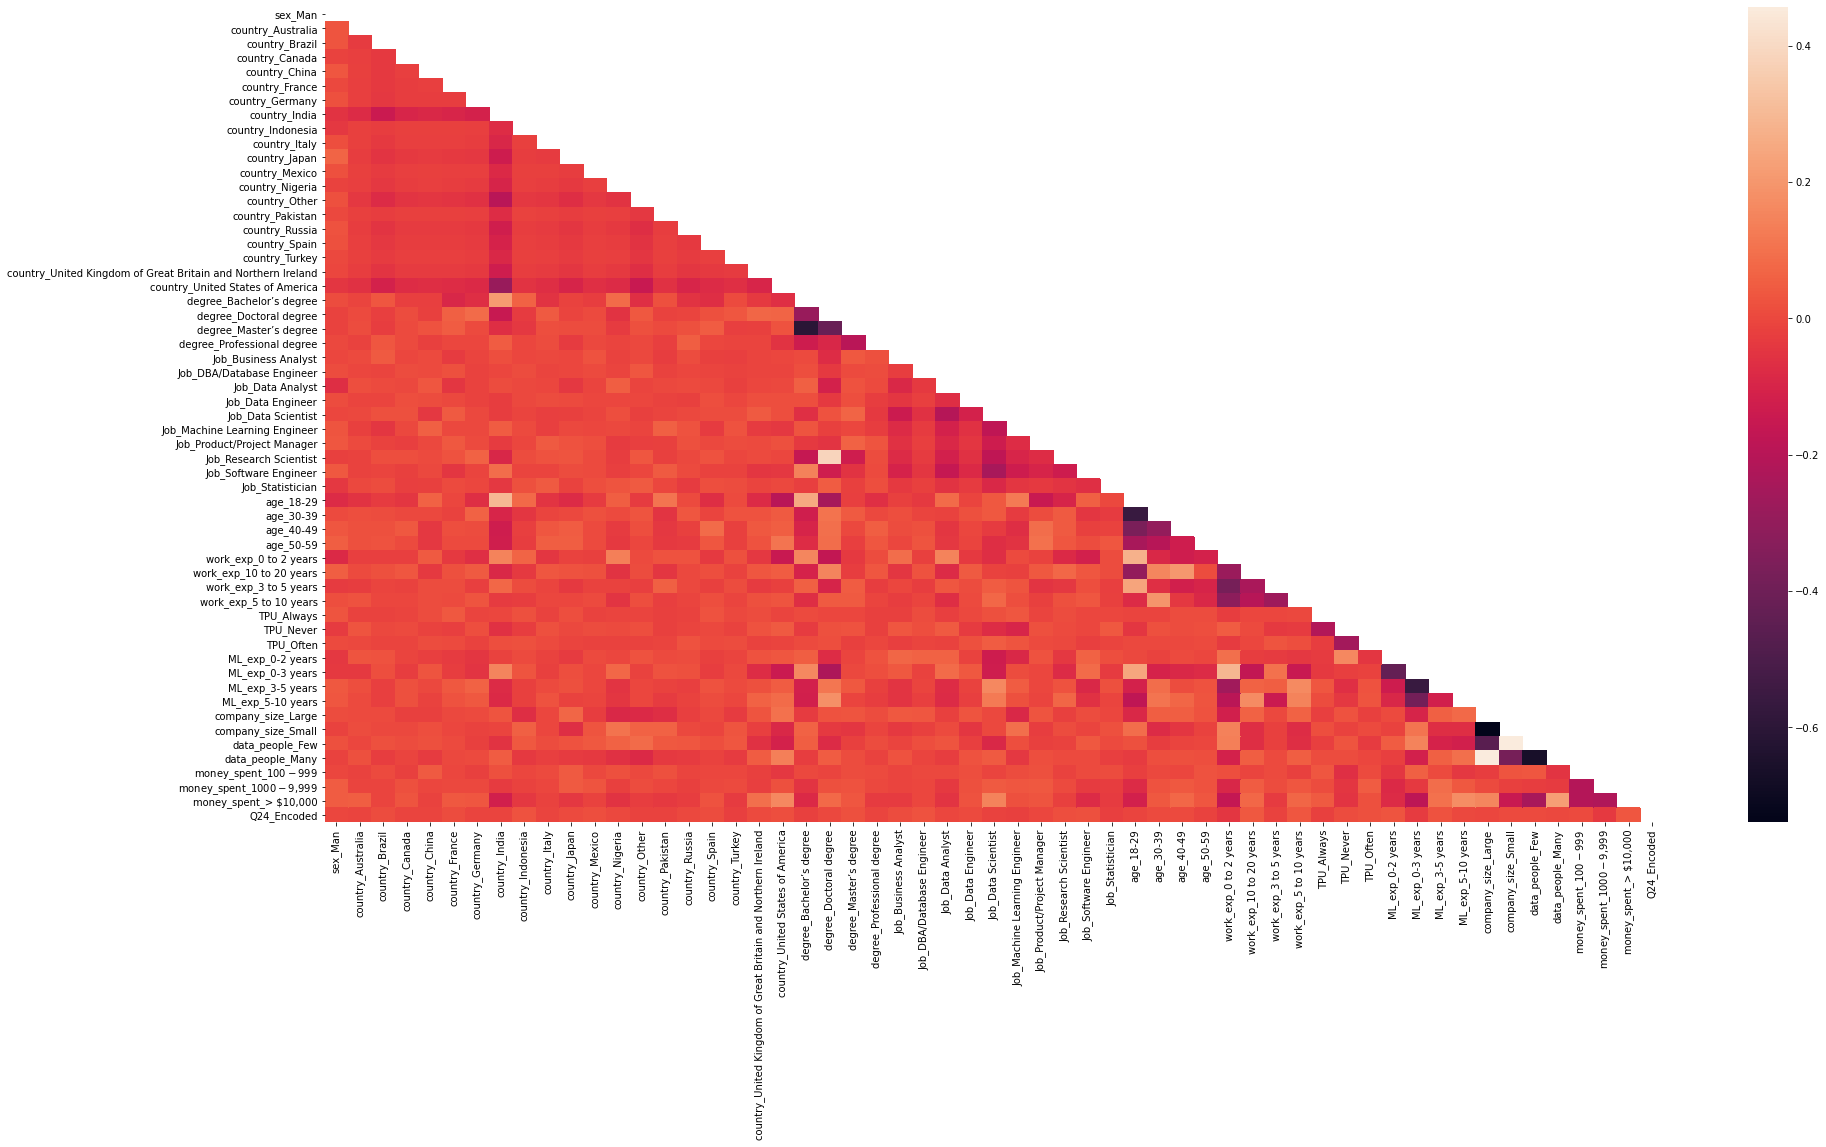

In [708]:
# Create a heatmap for single choice features, but the plot is not readable
mask = np.zeros_like(pd.concat([single_choice,y],axis=1).corr()*-1)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(30,15))
sns.heatmap(pd.concat([single_choice,y],axis=1).corr(), mask=mask,annot=False)

In [709]:
# Select 20 features with highest correlation to the target response
top20_feat = clean_data.corr().Q24_Encoded.nlargest(21)

Text(0.5, 1.0, 'Top 20 features with the highest positive correlation with target responses')

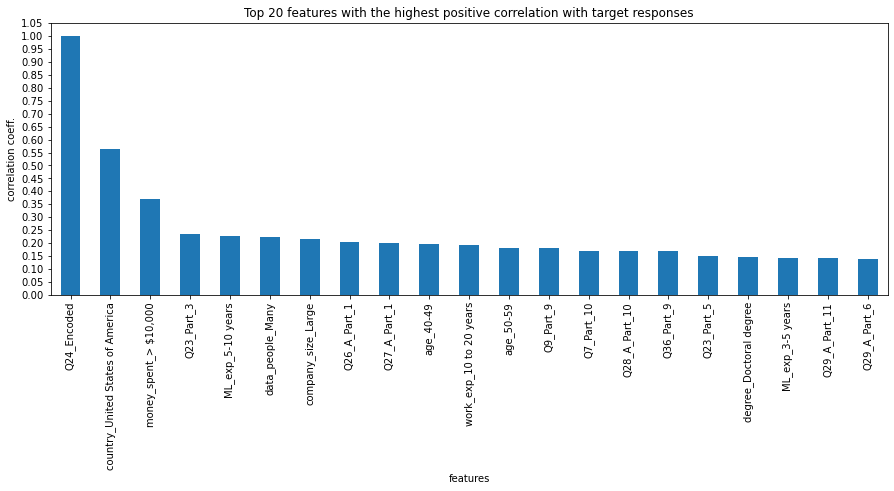

In [710]:
fig,ax1=plt.subplots(figsize=(15,5))
ax1=top20_feat.plot.bar()
ax1=plt.yticks(np.arange(0, 1.1, 0.05))
plt.ylabel('correlation coeff.')
plt.xlabel('features')
plt.title('Top 20 features with the highest positive correlation with target responses')


## 2.2 Feature Engineering
- Why is it important?

Feature engineering is critical to train a predictive model. By selecting the appropriate features, the predictive power of the model can be enhanced, and the complexity is largely reduced so that it’s faster and easier to run. In the context of our assignment, the classification model will have a better performance after using feature engineering. 

In [711]:
# Split training/test set
X=clean_data.drop('Q24_Encoded',axis=1).copy()
y=clean_data['Q24_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [712]:
# Reset data indices
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

- Lasso Regression

In [713]:
# Feature Selection
sel = SelectFromModel(LogisticRegression(C=0.02, penalty='l1',solver='liblinear'))
sel.fit(X_train, y_train)

selected_feat_lasso = X_train.columns[(sel.get_support())]
print('sNumber of features selected:',len(selected_feat_lasso))
print(selected_feat_lasso)

sNumber of features selected: 31
Index(['sex_Man', 'country_India', 'country_United States of America',
       'degree_Bachelor’s degree', 'degree_Master’s degree', 'age_18-29',
       'age_40-49', 'work_exp_0 to 2 years', 'work_exp_10 to 20 years',
       'ML_exp_0-3 years', 'ML_exp_3-5 years', 'company_size_Large',
       'company_size_Small', 'data_people_Few', 'data_people_Many',
       'money_spent_$1000-$9,999', 'money_spent_> $10,000', 'Q7_Part_1',
       'Q7_Part_4', 'Q10_Part_13', 'Q12_Part_3', 'Q16_Part_1', 'Q17_Part_1',
       'Q17_Part_3', 'Q23_Part_3', 'Q23_Part_5', 'Q26_A_Part_1',
       'Q28_A_Part_10', 'Q36_Part_9', 'Q37_Part_1', 'Q39_Part_8'],
      dtype='object')


In [714]:
X_train = X_train[selected_feat_lasso]
X_test = X_test[selected_feat_lasso]

## 3. Model Implementation and Tuning
- Cross-Validation
- Hyperparameters

## 3.1 Logstic Regression with Cross-Validation

In [715]:
# Creates a function that generates the mean probability of class 0 and 1
def LogitProb(X,y,C,solver,X_test,weight):
    model = LogisticRegression(C=C,class_weight=weight,solver=solver)    
    model.fit(X, y)
    prob_matrix=model.predict_proba(X_test)
    all_prob=pd.DataFrame(prob_matrix)
    probs=all_prob.mean(axis=0)
    
    return (probs[0],probs[1], all_prob)

In [716]:
# Create a function that computes the proabability for each class based on previous ordinal bianry prob.

def compute_prob_for_each_class(prob_list):
    prob_for_each_class=[prob_list[0][0]]
    for i in range(len(prob_list)-1):
        prob_for_each_class.append(prob_list[i+1][0]-prob_list[i][0])
        if i == len(prob_list)-2:
            prob_for_each_class.append(prob_list[-1][1])
    
    return prob_for_each_class
        

In [717]:
# Create a function that computes the probs for each row that belongs to a class
def predict_each_point(all_prob_df):
    data_point_prob_for_each_class=[all_prob_df.iloc[:,0]]

    for i in range(0,26,2):
        data_point_prob_for_each_class.append(all_prob_df.iloc[:,i+2]-all_prob_df.iloc[:,i])
        if i == 24:
            data_point_prob_for_each_class.append(all_prob_df.iloc[:,i+3])
            
    data_point_prob_df=pd.DataFrame(data_point_prob_for_each_class,index=np.arange(0,15,1))
    
    # Return the index/class of each sample point
    return data_point_prob_df

In [718]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [719]:
# A demo of Logistic Regression using C=1.0, solver='lbfgs' with cross validation

kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
fold_count=0
f1_sum=0
f1_list=[]

# Here X_train means is testing set,  X_test is validation set
for train_idx, test_idx in kfold.split(X_train):
    X_cross_train, X_cross_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_cross_train, y_cross_test = y_train[train_idx], y_train[test_idx]
    
    
    dummy_y = pd.DataFrame(index=y_cross_train.index)
    dummy_y['class']=1 
    prob_list=[]     # Includes the avg prob. estiamte for both Class 0 and 1, used to calculate each class 0-14
    all_prob_df=pd.DataFrame()          
    C=1.0
    solver='lbfgs'

    # Ordinal Logistic Regression
    for i in range(0,14):
        class_0_list = y_cross_train.index[y_cross_train == i].tolist()
        dummy_y.loc[class_0_list]=0

        prob1,prob2,all_prob=LogitProb(X_cross_train, dummy_y,C,solver,X_cross_test,weight='Balanced')
        prob_list.append([prob1,prob2])
        all_prob_df=pd.concat([all_prob_df,all_prob],axis=1)

    # Calculate the probability of each class
    prob_for_each_class=compute_prob_for_each_class(prob_list)


    data_point_prob_df = predict_each_point(all_prob_df)
    prediction = data_point_prob_df.idxmax()
    
    #f1-score
    f1=f1_score(y_cross_test, prediction, average='micro')
    
    fold_count+=1
    
    f1_sum += f1
    f1_list.append(f1)
    
    print ("Fold {}: F1 score: {}".format(fold_count, round(f1,3)))
    
  
    if fold_count == 10:
        print ("Average Fold F1 score is: {}".format(f1_sum/10))
        print("Variance of F1 scores is: {}".format(np.array(f1_list).std()))
    

  

Fold 1: F1 score: 0.417
Fold 2: F1 score: 0.398
Fold 3: F1 score: 0.413
Fold 4: F1 score: 0.392
Fold 5: F1 score: 0.359
Fold 6: F1 score: 0.437
Fold 7: F1 score: 0.382
Fold 8: F1 score: 0.437
Fold 9: F1 score: 0.433
Fold 10: F1 score: 0.429
Average Fold F1 score is: 0.4097125227378108
Variance of F1 scores is: 0.024891250937147488


## 3.2 Grid Search for Hyperparameter

In [720]:
best_params={}
best_accuracy=0

best_var = 0
best_prediction=0
solver = 'lbfgs'
f1_print=[]

# Grid searching for two hyperparameters C and weight
for C in [0.01,0.05,0.1,0.5,1,5]:
    for weight in ['Balanced',{0:0.33,1:0.67},{0:0.25,1:0.75},{0:0.2,1:0.8}]:
        
        kfold = KFold(n_splits=10)
        kfold.get_n_splits(X_train)
        fold_count=0
        f1_sum=0
        f1_list=[]

        # Here X_train means is testing set,  X_test is validation set
        for train_idx, test_idx in kfold.split(X_train):
            X_cross_train, X_cross_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
            y_cross_train, y_cross_test = y_train[train_idx], y_train[test_idx]


            dummy_y = pd.DataFrame(index=y_cross_train.index)
            dummy_y['class']=1 
            prob_list=[]     # Includes the avg prob. estiamte for both Class 0 and 1, used to calculate each class 0-14
            all_prob_df=pd.DataFrame()          
            C=C
            weight = weight

            # Ordinal Logistic Regression
            for i in range(0,14):
                class_0_list = y_cross_train.index[y_cross_train == i].tolist()
                dummy_y.loc[class_0_list]=0

                prob1,prob2,all_prob=LogitProb(X_cross_train, dummy_y,C,solver,X_cross_test,weight)
                prob_list.append([prob1,prob2])
                all_prob_df=pd.concat([all_prob_df,all_prob],axis=1)

            # Calculate the probability of each class
            prob_for_each_class=compute_prob_for_each_class(prob_list)


            data_point_prob_df = predict_each_point(all_prob_df)
            prediction = data_point_prob_df.idxmax()

            #f1-score
            f1=f1_score(y_cross_test, prediction, average='micro')

            fold_count+=1

            f1_sum += f1
            f1_list.append(f1)
            
            f1_print.append('C= {}, Weight={},Fold {} has a f1-score of {}'.format(C, weight, fold_count,f1))
    
        if (f1_sum/10) > best_accuracy:
            best_params = {'C':C, 'weight':weight}
            best_accuracy = f1_sum/10
            best_var = np.array(f1_list).var()
            best_prediction=prediction

print (best_params)
print ("Best Average f1-Score: {} ({})".format(round(best_accuracy,3),round(best_var,3)))      

print ("\nThe optimal log model uses C={}, and class weight= {} , and has an average f1-score of {} with a variance of {}".format(best_params['C'],best_params['weight'],round(best_accuracy,3),round(best_var,3)))

{'C': 0.1, 'weight': 'Balanced'}
Best Average f1-Score: 0.413 (0.001)

The optimal log model uses C=0.1, and class weight= Balanced , and has an average f1-score of 0.413 with a variance of 0.001


In [721]:
# Within the best model, where c=0.1 and weight = balanced, the best fold is Fold 6 (f1_score = 0.44801512287334594)
f1_print

['C= 0.01, Weight=Balanced,Fold 1 has a f1-score of 0.4075471698113208',
 'C= 0.01, Weight=Balanced,Fold 2 has a f1-score of 0.39433962264150946',
 'C= 0.01, Weight=Balanced,Fold 3 has a f1-score of 0.4188679245283019',
 'C= 0.01, Weight=Balanced,Fold 4 has a f1-score of 0.4018867924528302',
 'C= 0.01, Weight=Balanced,Fold 5 has a f1-score of 0.3648393194706994',
 'C= 0.01, Weight=Balanced,Fold 6 has a f1-score of 0.44234404536862004',
 'C= 0.01, Weight=Balanced,Fold 7 has a f1-score of 0.37996219281663524',
 'C= 0.01, Weight=Balanced,Fold 8 has a f1-score of 0.44045368620037806',
 'C= 0.01, Weight=Balanced,Fold 9 has a f1-score of 0.4215500945179584',
 'C= 0.01, Weight=Balanced,Fold 10 has a f1-score of 0.4215500945179584',
 'C= 0.01, Weight={0: 0.33, 1: 0.67},Fold 1 has a f1-score of 0.40943396226415096',
 'C= 0.01, Weight={0: 0.33, 1: 0.67},Fold 2 has a f1-score of 0.39433962264150946',
 'C= 0.01, Weight={0: 0.33, 1: 0.67},Fold 3 has a f1-score of 0.40943396226415096',
 'C= 0.01, We

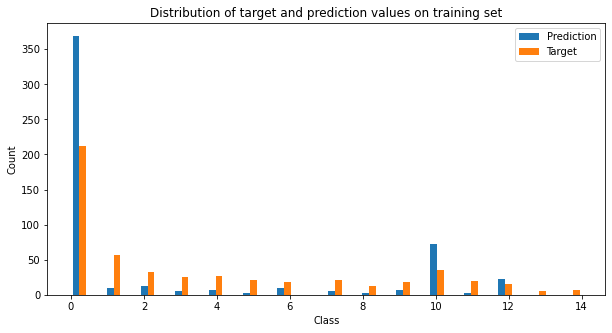

In [722]:
# Plot the distribution of target and prediction values
fig = plt.figure(figsize=(10,5))
plt.hist([best_prediction.astype(int), y_cross_test], bins=30, label=['Prediction', 'Target'])
plt.title("Distribution of target and prediction values on training set") 
plt.xlabel('Class')  
plt.ylabel('Count')
plt.legend(loc='upper right')

## 4. Testing set
- Model Hyperparameters: C=0.1, weight='Balanced', solver = 'lbfgs'

In [723]:
# Pick out the best fold, Fold 6 from the training set

kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
fold_count=0
best_fold=6       
i=1

for train_idx, test_idx in kfold.split(X_train):    
    
    if i==best_fold:
        X_cross_train, X_cross_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_cross_train, y_cross_test = y_train[train_idx], y_train[test_idx]
        
    i+=1
        
        

In [724]:
dummy_y = pd.DataFrame(index=y_cross_train.index)
dummy_y['class']=1 
prob_list=[]     # Includes the avg prob. estiamte for both Class 0 and 1, used to calculate each class 0-14
all_prob_df=pd.DataFrame()          
C=0.1
solver='lbfgs'
f1_sum=0

# Ordinal Logistic Regression
for i in range(0,14):
    class_0_list = y_cross_train.index[y_cross_train == i].tolist()
    dummy_y.loc[class_0_list]=0

    prob1,prob2,all_prob=LogitProb(X_cross_train, dummy_y,C,solver,X_test,weight='Balanced')
    
    prob_list.append([prob1,prob2])
    
    all_prob_df=pd.concat([all_prob_df,all_prob],axis=1)

# Calculate the probability of each class
prob_for_each_class=compute_prob_for_each_class(prob_list)


data_point_prob_df = predict_each_point(all_prob_df)
prediction = data_point_prob_df.idxmax()
    
#f1-score between y_test and predictions
f1=f1_score(y_test, prediction, average='micro')
    
print (" F1 score for the testing set is: {}".format(f1))

 F1 score for the testing set is: 0.4123348017621145


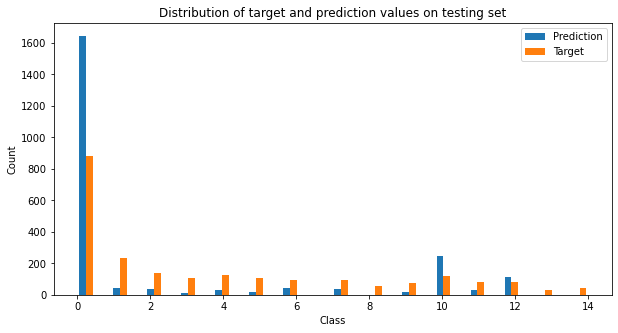

In [725]:
# Plot the distribution of target and prediction values
fig = plt.figure(figsize=(10,5))
plt.hist([prediction.astype(int), y_test.astype(int)], bins=30, label=['Prediction', 'Target'])
plt.title("Distribution of target and prediction values on testing set") 
plt.xlabel('Class')  
plt.ylabel('Count')
plt.legend(loc='upper right')